In [2]:
import h5py
from scipy.spatial.distance import pdist,cdist, squareform
import matplotlib.pyplot as plt
import numpy as np
from activ.analytics import heatmap

In [3]:
file = '/Users/ahyeon/Desktop/activ misc/sweep_u2-10_c2-50_i50_raw-oc-cluster_uoinmf-bm-predict/umap_clustering_sweep.h5'

In [4]:
f = h5py.File(file, 'r')

In [5]:
umap_dims = f['umap_dimensions'][:]
score = f['score'][:]
norm_score = f['norm_score'][:]
clusters = f['clusters'][:]
cluster_sizes = f['cluster_sizes'][:]
emb = f['umap_embeddings'][:]
scale = f['umap_embeddings_dimscale'][:][:54]

In [6]:
umap_dims

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])

In [54]:
(247*246)/2

30381.0

In [9]:
heatmap?

[ 654.76481062  620.0186653   618.04470348  614.70352208  612.7788306
  611.20777475  618.7235553   613.50644185  613.25774845]
[ 100627.1615271    95830.66167772   95511.9829922    95005.55692705
   94815.09009046   94624.62691138   95632.85021963   94964.0068931
   94918.76230566]


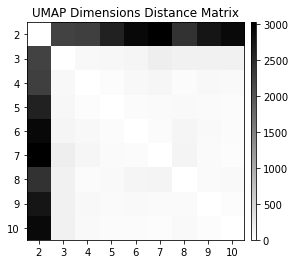

In [10]:
all_means = np.ones((9, 30381))
for ii,dim in enumerate(umap_dims):
    all_dmat = np.zeros((emb.shape[0], 30381))
    for x in range(emb.shape[0]):
        dmat = pdist(emb[x][:,scale==dim], metric='euclidean')
        all_dmat[x,:] = dmat
    mean_dmat = all_dmat.mean(axis=0)
    all_means[ii,:] = mean_dmat.reshape(1,30381)
    

heatmap(squareform(pdist(all_means, metric='sqeuclidean')), row_labels=umap_dims, col_labels=umap_dims,
        cmap='gray_r', title='UMAP Dimensions Distance Matrix', xlab='', ylab='')

print(np.linalg.norm(all_means, axis=1))
print(np.sum(all_means, axis=1))
  
plt.savefig('/Users/ahyeon/Desktop/activ misc/umap_pdist.pdf')